In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz




In [2]:
dataset1 = pd.read_csv("diamonds.csv")
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [3]:
dataset1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [4]:
dataset2 = dataset1.copy(deep=True)

In [5]:
#Numerical Encodings

cut_dict = {'Fair' : 1,
           'Good' : 2,
           'Very Good': 3,
           'Premium': 4,
           'Ideal': 5}

color_dict = {'J' : 1,
           'I' : 2,
           'H': 3,
           'G': 4,
           'F': 5,
           'E': 6,
           'D': 7}


clarity_dict = {'I1' : 1,
           'SI2' : 2,
           'SI1': 3,
           'VS2': 4,
           'VS1': 5,
           'VVS2': 6,
           'VVS1': 7,
           'IF': 8}



In [6]:
dataset2['cut_encoded'] = dataset2.cut.map(cut_dict)
dataset2['color_encoded'] = dataset2.color.map(color_dict)
dataset2['clarity_encoded'] = dataset2.clarity.map(clarity_dict)

In [7]:
dataset2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [8]:
diamonds = dataset2.copy(deep=True)

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [10]:
diamonds = diamonds.drop(columns=['cut','color','clarity'])

In [11]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,330,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,327,3.89,3.84,2.31,4,6,3
2,0.23,56.9,65.0,328,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,337,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,338,4.34,4.35,2.75,2,1,2


In [12]:
datastand = diamonds.copy(deep=True)

In [15]:
ds = diam_scale.fit_transform(datastand)

In [13]:
Xdiam = diamonds.loc[:, diamonds.columns != 'price'].to_numpy()
Ydiam = diamonds.price

In [14]:
diam_scale = StandardScaler()
Xdiam_S = diam_scale.fit_transform(Xdiam)


In [16]:
ds

array([[-1.19816781, -0.17409151, -1.09967199, ...,  0.98147332,
         0.93716275, -1.24521508],
       [-1.24036129, -1.36073849,  1.58552871, ...,  0.08588908,
         0.93716275, -0.63809506],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.70527938,
         0.93716275,  0.57614496],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ..., -0.80969515,
         1.52502147, -0.63809506],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.08588908,
        -0.8264134 , -1.24521508],
       [-0.10113725,  0.31452784, -1.09967199, ...,  0.98147332,
         1.52502147, -1.24521508]])

In [18]:
Ydiam_S = ds[:,3]

In [21]:
Ydiam_S

array([-0.90359371, -0.9043457 , -0.90409503, ..., -0.29448037,
       -0.29523236, -0.29422971])

In [22]:
k_val = 6 # Inferred from the graph above 

#Unstandardized 
Xdiam_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(Xdiam, Ydiam_S)
Xdiam_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(Xdiam, Ydiam)

#Standardized 
Xdiam_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(Xdiam_S, Ydiam)
Xdiam_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(Xdiam_S, Ydiam_S)

## Random Forest Regression

In [24]:
pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': np.arange(1,4,1),
    'model__n_estimators': np.arange(10, 210, 10),
    'model__max_depth': np.arange(1, 20, 1)
    
}


In [ ]:
diam_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(Xdiam_F, Ydiam_S)

Fitting 10 folds for each of 1140 candidates, totalling 11400 fits


In [28]:
poly_result = pd.DataFrame(diam_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (Diamonds):',diam_RF.best_params_,',Test RMSE:',diam_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (Diamonds): {'model__max_depth': 19, 'model__max_features': 2, 'model__n_estimators': 120} ,Test RMSE: -728.168224156366
Train RMSE: -232.80770687332438


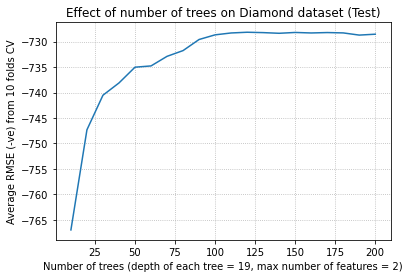

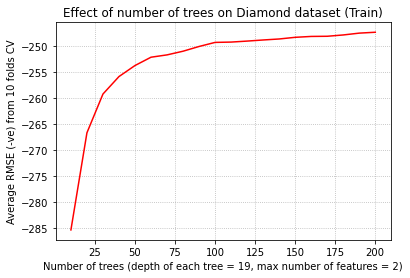

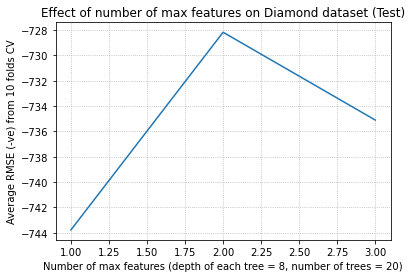

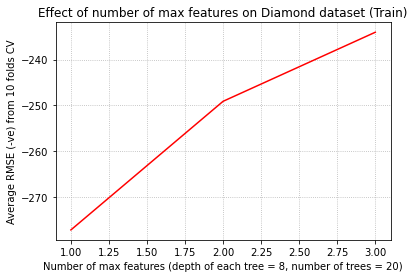

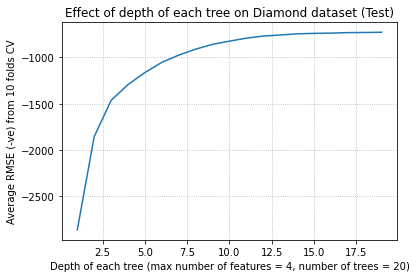

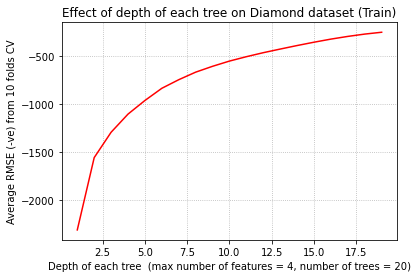

In [34]:
max_features = np.arange(1,4,1).reshape(3)
n_estimators = np.arange(10, 210, 10).reshape(20)
max_depth = np.arange(1, 20, 1).reshape(19)

diam_score = list((poly_result[(poly_result['param_model__max_depth'] == 19) & (poly_result['param_model__max_features'] == 2)]).mean_test_score)
diam_train = list((poly_result[(poly_result['param_model__max_depth'] == 19) & (poly_result['param_model__max_features'] == 2)]).mean_train_score)
plt.plot(n_estimators,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 19, max number of features = 2)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Test)')
plt.savefig('Q21a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 19, max number of features = 2)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Train)')
plt.savefig('Q21b.png',dpi=300,bbox_inches='tight')
plt.show()

diam_score = list((poly_result[(poly_result['param_model__max_depth'] == 19) & (poly_result['param_model__n_estimators'] == 120)]).mean_test_score)
diam_train = list((poly_result[(poly_result['param_model__max_depth'] == 19) & (poly_result['param_model__n_estimators'] == 120)]).mean_train_score)
plt.plot(max_features,diam_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Test)')
plt.savefig('Q21c.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,diam_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Train)')
plt.savefig('Q21d.png',dpi=300,bbox_inches='tight')
plt.show()

bike_score = list((poly_result[(poly_result['param_model__max_features'] == 2) & (poly_result['param_model__n_estimators'] == 120)]).mean_test_score)
bike_train = list((poly_result[(poly_result['param_model__max_features'] == 2) & (poly_result['param_model__n_estimators'] == 120)]).mean_train_score)
plt.plot(max_depth,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 4, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Test)')
plt.savefig('Q21e.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 4, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Train)')
plt.savefig('Q21f.png',dpi=300,bbox_inches='tight')
plt.show()

## Out of Bag error

In [35]:
print('OOB, Diamond:',RandomForestRegressor(random_state=42,max_depth=8,
                                         max_features=4, n_estimators=20, oob_score=True).fit(Xdiam_F,Ydiam).oob_score_)


OOB, Diamond: 0.9734938330134085


/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [40]:
!pip install pydot


In [43]:
import pydot
from IPython.display import Image


## Tree Visualization

In [36]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(Xdiam_F,Ydiam)

In [37]:
chY = SelectKBest(score_func=f_regression, k=6)
XTranscode_Test = chY.fit_transform(diamonds.loc[:, diamonds.columns != 'price'], diamonds["price"])
column_names = diamonds.loc[:, diamonds.columns != 'price'].columns[chY.get_support()]

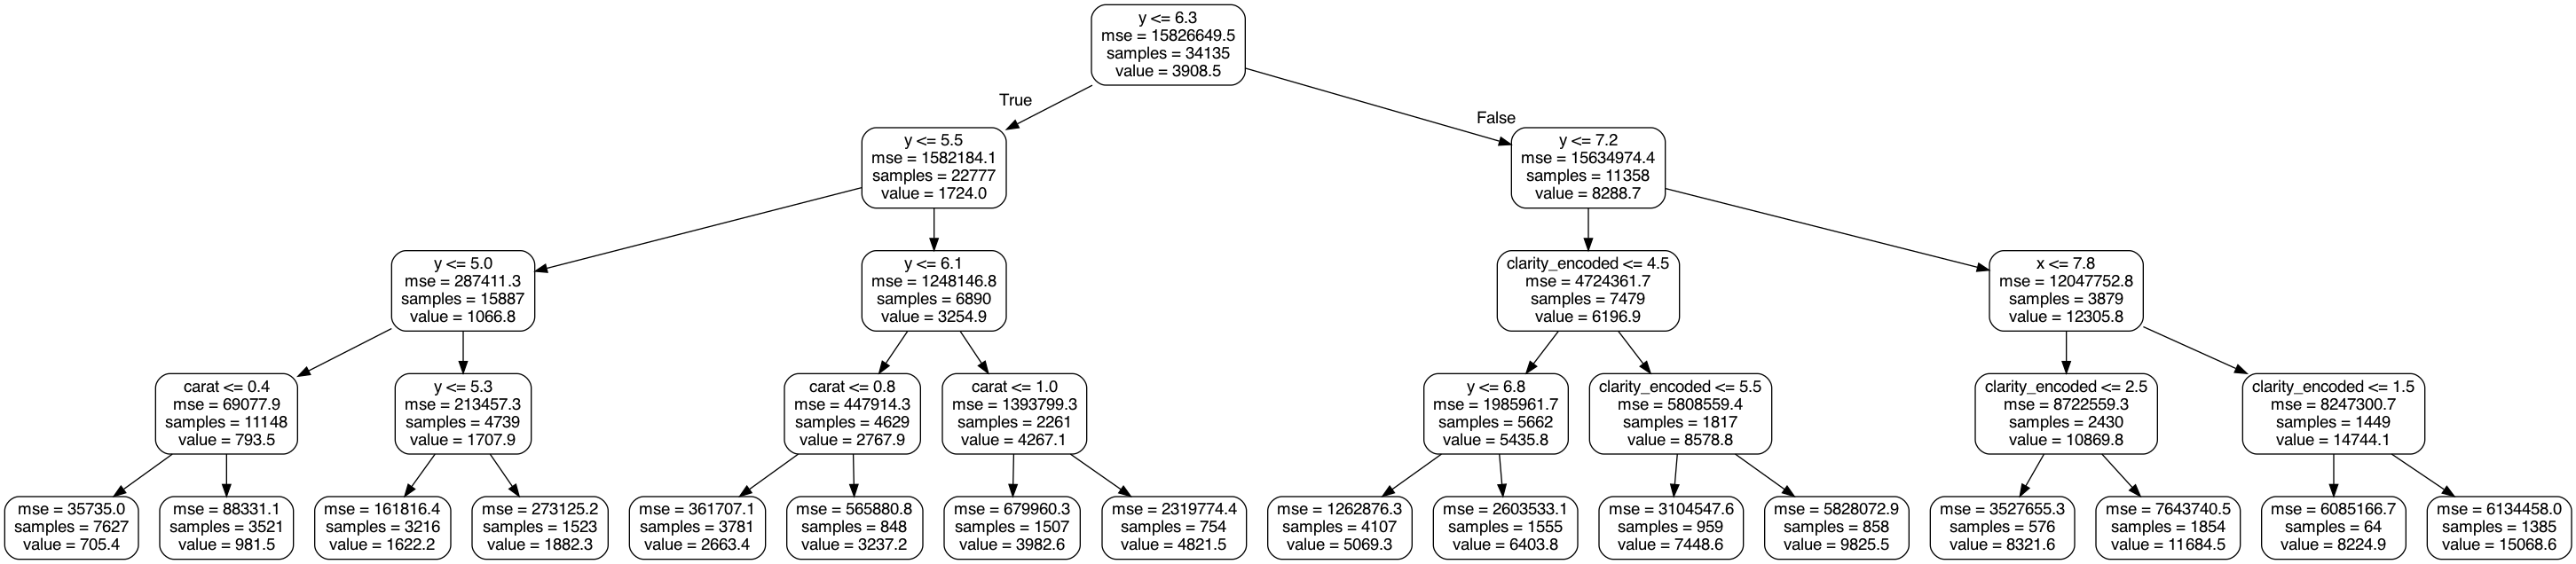

In [81]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree (1).dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree (1).dot')
Image(graph.create_png())

In [ ]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

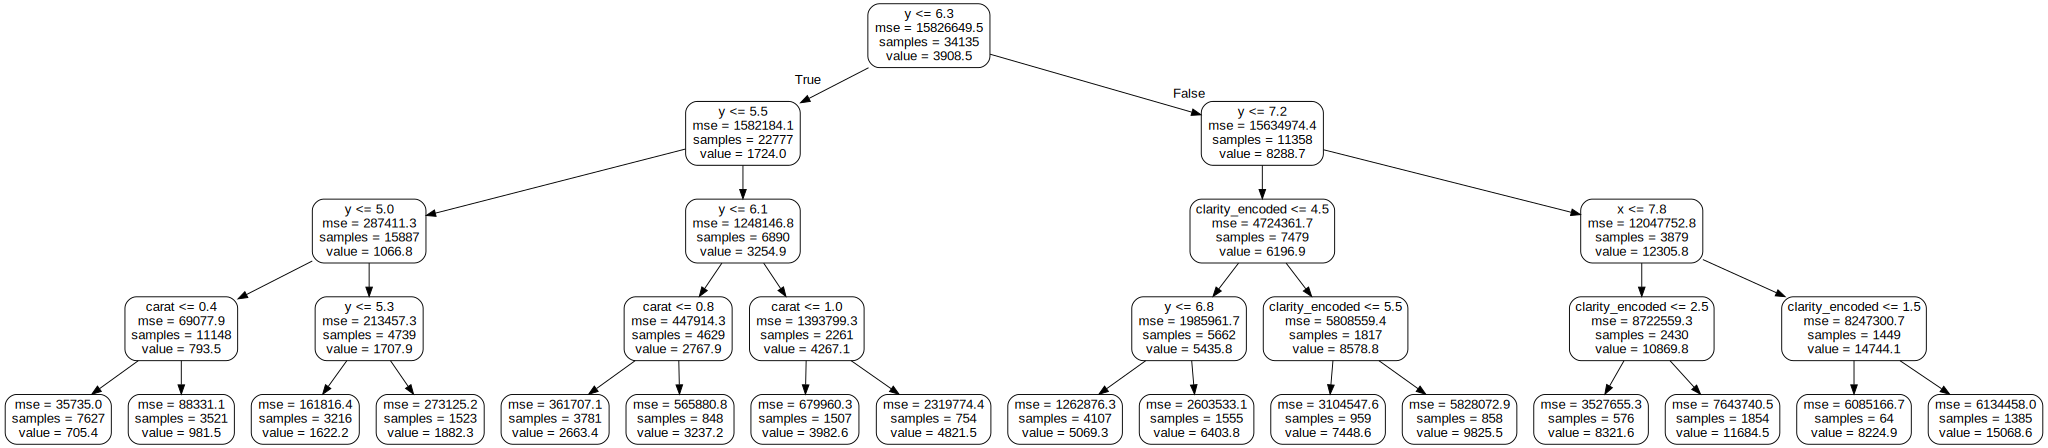

In [52]:
import graphviz
graphviz.Source.from_file('tree.dot')

In [74]:
import json
import numpy as np

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

In [76]:
files = ['ECE219_tweet_data/tweets_#gohawks.txt', 'ECE219_tweet_data/tweets_#gopatriots.txt', 
         'ECE219_tweet_data/tweets_#nfl.txt', 'ECE219_tweet_data/tweets_#patriots.txt', 
         'ECE219_tweet_data/tweets_#sb49.txt', 'ECE219_tweet_data/tweets_#superbowl.txt']

for file in files:
    report_statistics(file)

ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:  750.8942646068899
Average number of followers of users posting

In [78]:
import math 
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

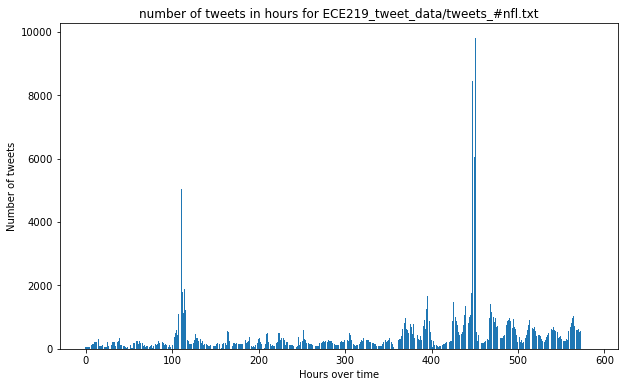

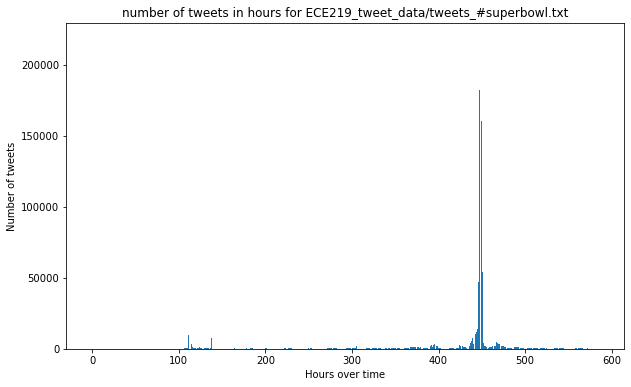

In [79]:
q2_files = ['ECE219_tweet_data/tweets_#nfl.txt','ECE219_tweet_data/tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)

In [86]:
def report_features(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        total_followers = 0
        total_retweets = 0
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        #initialize features
        features = np.zeros((total_hours,5))
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour #time of the day
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            features[index][0] += 1 #number of tweets
            features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
            features[index][2] += json_obj['author']['followers'] #number of followers
            features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers
            
    return features

In [87]:
import statsmodels.api as sm
from sklearn import metrics

for file in files:
    features = report_features(file)
    x = features[:-1,:]
    y_true = features[1:,0]

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    print('\n')

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  717636.442130061
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              128.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                    5.72e-91
Time:                        17:43:55   Log-Likelihood:                         -4716.9
No. Observations:                 578   AIC:                                      9444.
Df Residuals:                     573   BIC:                                      9466.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P

In [88]:
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time
    
max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)

In [89]:
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Sum of ranking score',
                'Sum of passivity', 'Total number of unique users','Total number of unique authors', 
                'Total number of user mentions']

mnth_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_days(user_create_time, tweet_create_time):
    user_create_date = user_create_time.split(' ')
    tweet_create_date = tweet_create_time.split(' ')
    user_create_date = datetime.datetime(int(user_create_date[-1]), mnth_to_int[user_create_date[1]], int(user_create_date[2]))
    tweet_create_date = datetime.datetime(int(tweet_create_date[-1]), mnth_to_int[tweet_create_date[1]], int(tweet_create_date[2]))
    created_days = tweet_create_date - user_create_date
    created_days = created_days.days
    return created_days
    

def report_features2(filename, min_time, max_time):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        user_ids = {hour:set() for hour in range(total_hours)}
        author_nicks = {hour:set() for hour in range(total_hours)}
        
        #initialize features
        features = np.zeros((total_hours,len(feature_names)))
        
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour
            
        for line in lines:
            json_obj = json.loads(line)
            
            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                features[index][2] += json_obj['author']['followers'] #number of followers
                features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])               
                features[index][7] = len(user_ids[index]) #number of unique users
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index]) #number of unique authors
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
        
        return features

def scatter_plot(features, hashtag, y_pred, pvalues, feature_names):
    ranked_index = np.argsort(pvalues)
    print('Hashtag: ' + hashtag)
    for i in range(3):
        plt.figure(figsize = (8,5))
        plt.scatter(features[:,ranked_index[i]], y_pred, alpha=0.5)
        plt.xlabel(feature_names[ranked_index[i]])
        plt.ylabel("Number of tweets next hour")
        plt.grid(True)
        plt.show()
    print('-' * 80)

Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  296042.3173115547
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              201.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                   1.43e-178
Time:                        18:00:21   Log-Likelihood:                         -4407.0
No. Observations:                 571   AIC:                                      8834.
Df Residuals:                     561   BIC:                                      8878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      

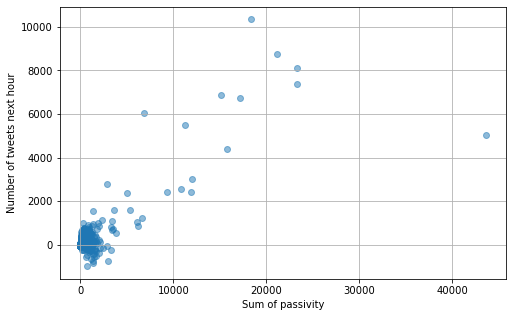

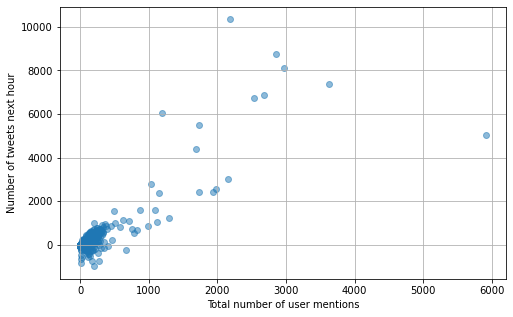

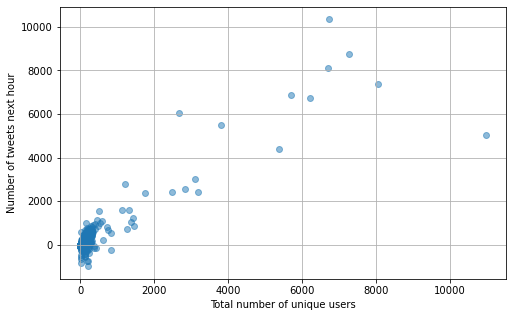

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#gopatriots.txt
MSE:  21727.945699825388
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              161.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                   5.56e-158
Time:                        18:00:23   Log-Likelihood:                         -3661.3
No. Observations:                 571   AIC:                                      7343.
Df Residuals:                     561   BIC:                                      7386.
Df Model:                          10                                                  
Covariance Type:            nonrobust             

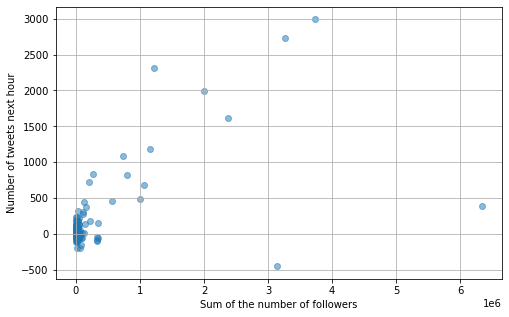

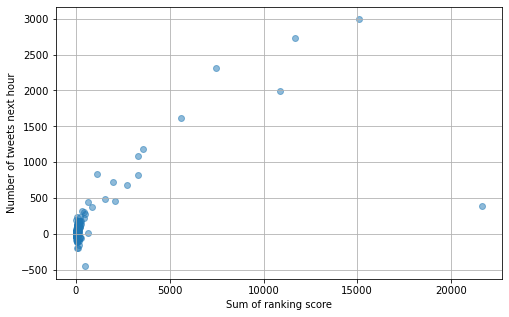

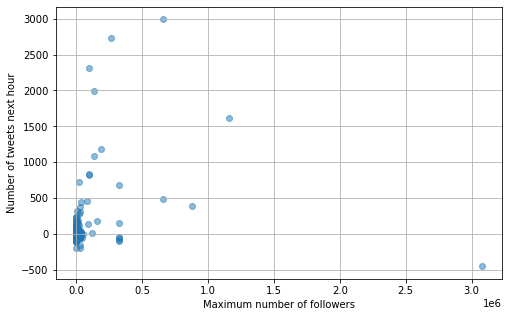

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#nfl.txt
MSE:  184288.3990593153
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              186.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                   7.02e-171
Time:                        18:00:35   Log-Likelihood:                         -4271.7
No. Observations:                 571   AIC:                                      8563.
Df Residuals:                     561   BIC:                                      8607.
Df Model:                          10                                                  
Covariance Type:            nonrobust                     

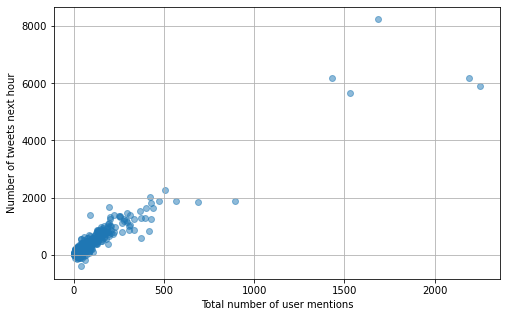

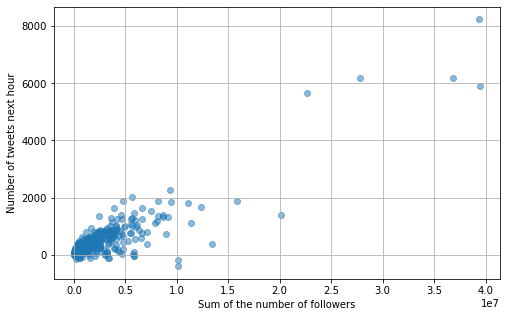

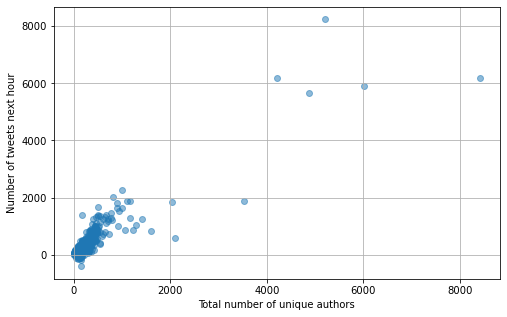

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#patriots.txt
MSE:  3619767.990944839
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              202.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                   1.18e-178
Time:                        18:01:06   Log-Likelihood:                         -5121.8
No. Observations:                 571   AIC:                                  1.026e+04
Df Residuals:                     561   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                

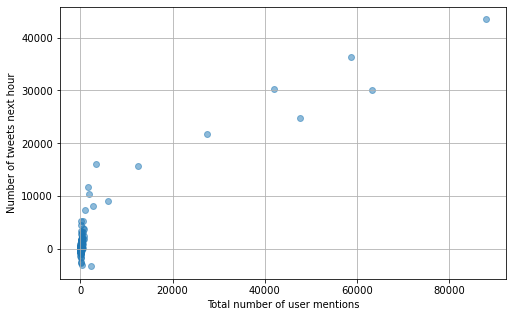

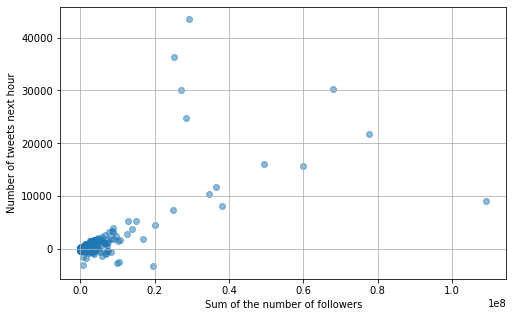

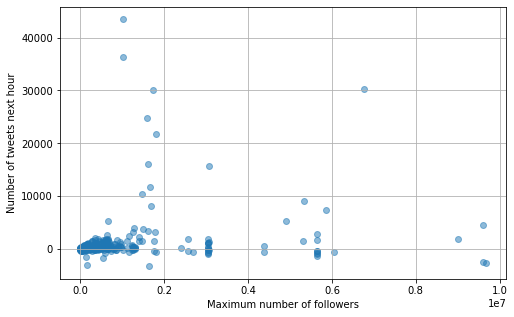

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#sb49.txt
MSE:  8860126.964503594
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              480.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                   1.30e-267
Time:                        18:02:01   Log-Likelihood:                         -5377.4
No. Observations:                 571   AIC:                                  1.077e+04
Df Residuals:                     561   BIC:                                  1.082e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                    

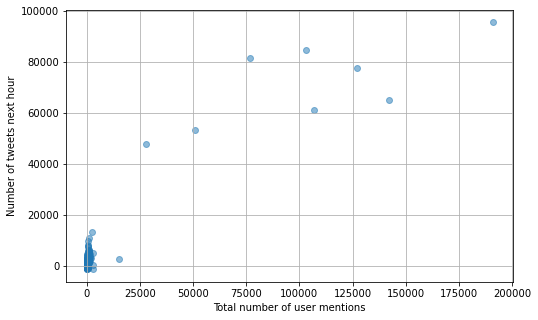

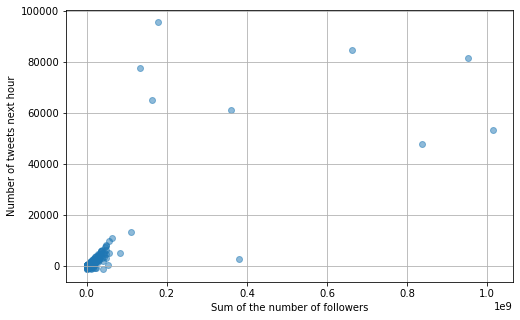

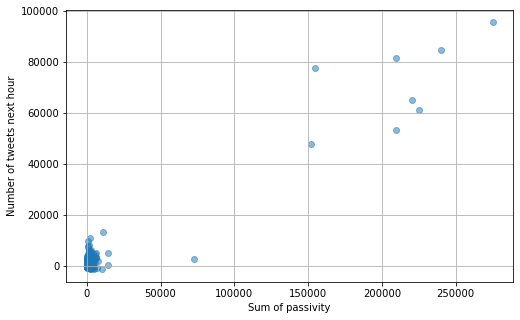

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#superbowl.txt
MSE:  15458967.544835165
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              932.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:03:55   Log-Likelihood:                         -5536.3
No. Observations:                 571   AIC:                                  1.109e+04
Df Residuals:                     561   BIC:                                  1.114e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust              

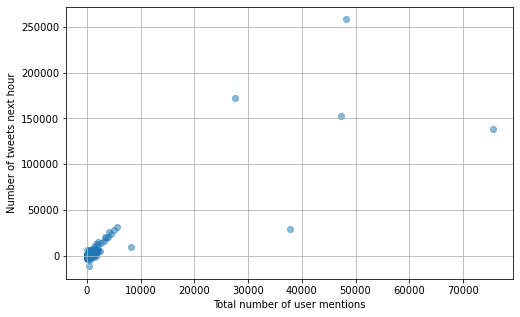

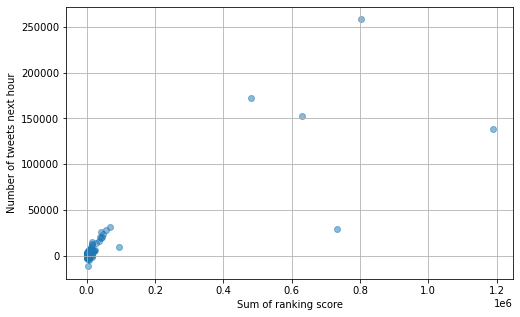

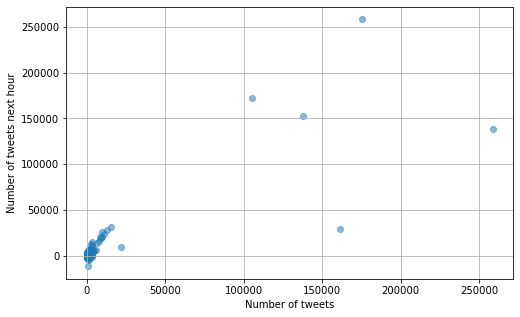

--------------------------------------------------------------------------------




In [90]:
import statsmodels.api as sm
from sklearn import metrics


for file in files:
    features = report_features2(file, min_time_agg, max_time_agg)
    x = features[:-1,:] #training features
    y_true = features[1:,0] #true labels

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    pvalues = lr_fit.pvalues
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    scatter_plot(x, file, y_pred, pvalues, feature_names)
    print('\n')


In [91]:
# find the intersected time intervals for all twitter data
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time
    
max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)